# Problem Statement

The hotel company aims to increase direct website visits and improve operational efficiency across its resort and city hotel operations. With a growing volume of reservation data coming from various distribution channels, it becomes crucial to identify patterns that drive customer engagement and to anticipate operational demands.

# Objective



To address these challenges, a two-part data-driven analytical approach was employed. <br>
1.   **Exploratory data analysis** to identify website visits and operational efficiency.
2.   **A time series forecasting model** using **Prophet** and **LightGBM** were developed to predict the number of future visitors, enabling the company to better plan marketing efforts, optimize pricing, and manage staffing based on expected demand.

## Data Description

**`Hotel`**: The datasets contains the booking information of two hotel. One of the hotels is a resort hotel and the other is a city.<br>
**`Is Canceled`**: Value indicating if the booking was canceled (1) or not (0).<br>
**`Lead Time`**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.<br>
**`stays_in_weekend_nights`**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by counting the number of week nights. <br>
**`adults`**: Number of adults.<br>
**`children`**: Number of children.<br>
**`babies`**: Number of babies.<br>
**`market_segment`**: "Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”".<br>
**`distribution_channel`**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators".<br>
**`is_repeated_guest`**: Value indicating if the booking name was from a repeated guest (1) or not (0).<br>
**`previous_cancellations`**: Number of previous bookings that were cancelled by the customer prior to the current booking.<br>
**`previous_bookings_not_canceled`**: Number of previous bookings not cancelled by the customer prior to the current booking.<br>
**`reserved_room_type`**: Code of room type reserved. Code is presented instead of designation for anonymity reasons.<br>
**`assigned_room_type`**: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.<br>
**`booking_changes`**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.<br>
**`deposit_type`**: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.<br>
**`days_in_waiting_list`**: Number of days the booking was in the waiting list before it was confirmed to the customer.<br>
**`customer_type`**: "Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking"<br>
**`total_of_special_requests`**: Number of special requests made by the customer (e.g. twin bed or high floor).<br>
**`reservation_status`**: Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.<br>
**`reservation_status_date`**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.<br>
**`name`**: Name of the Guest (Not Real).<br>
**`email`**: Email (Not Real).<br>
**`phone-number`**: Phone number (not real).<br>

*Note: some columns aren't described in data description source (gsheet).*



# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('drive/MyDrive/DS/hotel_reservation_dataset.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [2]:
# check column names
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [3]:
# check column & row size
df.shape

(119390, 36)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
#check misising values
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


## Dataset Information
* Number of Entries: The dataset consists of **119,390 entries.**

* Columns: The dataset contains **36 columns**, which represent various attributes related to hotel reservations.

* Data Types:<br>
 * A majority of the columns, 16 to be precise, are of the **object** data type (it's representing strings or categorical data).<br>
 * 16 columns are of the **int64** data type, representing integer values.<br>
 * 4 columns are of the **float64** data type, which typically denotes decimal values.<br>
 * `reservation_status_date` data type is *object*, we need to transform it into **`datetime`**.

* Missing Values:<br>
 * The column **`children`** has 4 missing values.<br>
 * The column **`country`** has 488 missing values.<br>
 * The column **`agent`** has 16,340 missing values.<br>
 * The column **`company`** has a significant number of missing values, total 112,593.<br>

These missing values may need to be handled, depending on the specific context of the analysis or the type of model we plan to develop.

In [6]:
#change data type
df["reservation_status_date"]= pd.to_datetime(df["reservation_status_date"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [8]:
#data desc (numeric data)
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


<Axes: >

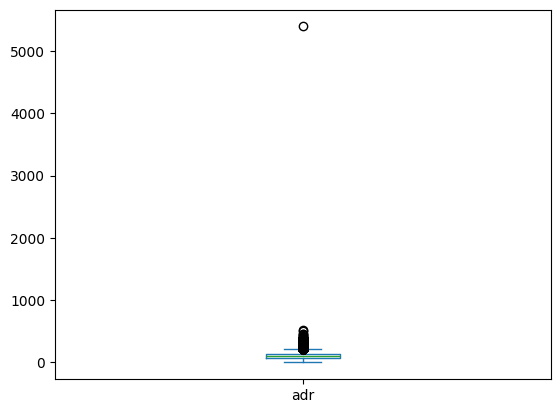

In [9]:
#check outlicer on adr feature
df['adr'].plot(kind = 'box')

In [10]:
# replacing outliers (assuming waiting list in 30 days)
for i in df.index:
  if df.loc[i,"days_in_waiting_list"] > 30:
     df.loc[i,"days_in_waiting_list"] = 30

In [11]:
# since it seems has noises on adr feature if we look at the box plot above, we only use adr data < 5000,
df= df[df['adr']<5000]

In [12]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119385.000000,119389.000000,...,119389.000000,119389.000000,119389.000000,103049.000000,6797.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389
mean,0.370411,104.011994,2016.156555,27.165292,15.798164,0.927606,2.500314,1.856402,0.103891,0.007949,...,0.087119,0.137098,0.221118,86.694107,189.266735,0.860347,101.786744,0.062518,0.571368,2016-07-30 00:26:45.132801280
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.560000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,30.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482917,106.863358,0.707479,13.605134,8.780826,0.998614,1.908289,0.579263,0.398563,0.097437,...,0.844340,1.497443,0.652304,110.774841,131.655015,4.929921,48.153554,0.245292,0.792800,NaN


In [13]:
#data desc incld categorical
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119389,119389,119389,118901,119389,119389,119389,119389,119389,119389,119389,119389,119389,119389,119389
unique,2,12,5,177,8,5,10,12,3,4,3,81502,115888,119389,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,422-804-6403,************4923
freq,79329,13877,92309,48589,56477,97869,85993,74052,104641,89612,75166,48,6,1,28


In [14]:
#check unique value
for col in df.describe(include = 'object'):
    print(col)
    print(df[col].unique())
#to make readable separated using --- between checking columns
    print('-'*70)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LK

In [15]:
#company and agent feature include in numerical data, since they are not specific reffering to company or agent name. We drop these feature
df.drop(['company','agent'],axis = 1,inplace = True)

In [16]:
df.dropna(inplace = True)

In [17]:
#check again overall cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118897 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118897 non-null  object        
 1   is_canceled                     118897 non-null  int64         
 2   lead_time                       118897 non-null  int64         
 3   arrival_date_year               118897 non-null  int64         
 4   arrival_date_month              118897 non-null  object        
 5   arrival_date_week_number        118897 non-null  int64         
 6   arrival_date_day_of_month       118897 non-null  int64         
 7   stays_in_weekend_nights         118897 non-null  int64         
 8   stays_in_week_nights            118897 non-null  int64         
 9   adults                          118897 non-null  int64         
 10  children                        118897 non-null  float64     

In [18]:
#check are there missing values left
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


# Data Analysis and Insights

## Feature Engineering

In [19]:
# Feature Engineering
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_weekend_nights"]
df["room_mismatch"] = df["reserved_room_type"] != df["assigned_room_type"]

## INCREASE WEBSITE VISITS

### Channel Conversion Rate
To boost direct traffic, we can focus on analyzing channel effectiveness, customer behavior, and booking patterns.

In [20]:
channel_conversion = df.groupby("distribution_channel").agg(
    total_bookings=("is_canceled", "count"),
    successful_bookings=("is_canceled", lambda x: (x == 0).sum()),
    canceled_bookings=("is_canceled", lambda x: (x == 1).sum())
)
channel_conversion["conversion_rate"] = channel_conversion["successful_bookings"] / channel_conversion["total_bookings"]
channel_conversion

,total_bookings,successful_bookings,canceled_bookings,conversion_rate
distribution_channel,,,,
Corporate,6491,5037,1454,0.775998
Direct,14483,11940,2543,0.824415
GDS,193,156,37,0.808290
TA/TO,97729,57611,40118,0.589497
Undefined,1,1,0,1.000000


Key takeaways:

1.  **High Booking Volume Channels** <br>
The "Direct" and "TA/TO" channels have significantly higher total bookings compared to the other channels ("GDS", "Corporate", "Undefined").
2.  **Direct Channel Dominance** <br>
The "Direct" channel is the largest in terms of both total bookings and successful bookings.
3.  **Conversion Rate Variability** <br>
The conversion rates (successful bookings / total bookings) vary across channels. While "Undefined" and "Corporate" have a 100% conversion rate (though with very low booking volume), "Direct" and "TA/TO" have lower but still high conversion rates (around 82-83%). "GDS" has a slightly lower conversion rate of about 80.8%.
4.  **Canceled Bookings** <br>
The "Direct" and "TA/TO" channels also account for the majority of canceled bookings, which is expected given their higher total booking volume. The "Undefined" and "Corporate" channels have zero canceled bookings, again likely due to the low volume.

In summary, the "Direct" and "TA/TO" channels are the main drivers of bookings. The conversion rates are generally high across all channels with meaningful volume, suggesting good booking process efficiency. The lower volume channels ("GDS", "Corporate", "Undefined") show perfect or near-perfect conversion, but their impact on overall conversion is limited due to the low number of bookings.

### Repeat Guests from Direct Channel

In [21]:
repeat_direct = df[df["distribution_channel"] == "Direct"].groupby("is_repeated_guest").size()
repeat_direct

,0
is_repeated_guest,
0,13549
1,934


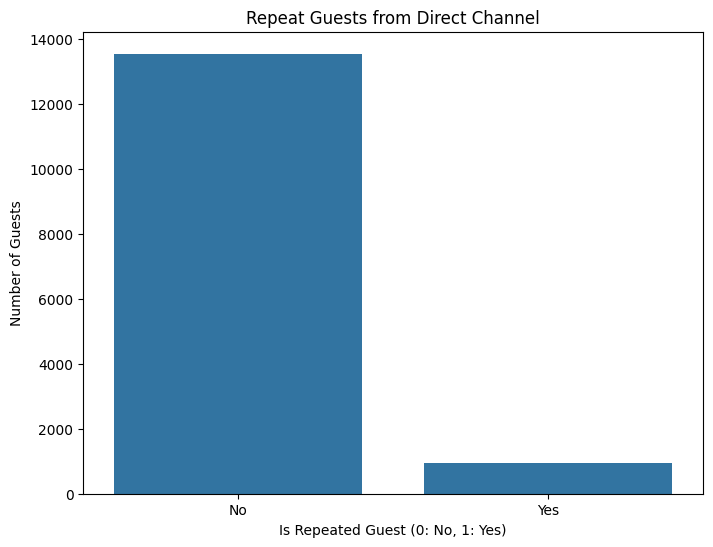

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=repeat_direct.index, y=repeat_direct.values)
plt.title('Repeat Guests from Direct Channel')
plt.xlabel('Is Repeated Guest (0: No, 1: Yes)')
plt.ylabel('Number of Guests')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Key takeaways:

*   The output `repeat_direct` shows the count of bookings from the "Direct" distribution channel, separated by whether the guest is a repeated guest or not.
*   It indicates that within the "Direct" channel:
    *   A significant majority of bookings are from *new* guests (represented by `is_repeated_guest` value 0).
    *   A smaller, but still notable, number of bookings are from *repeated* guests (represented by `is_repeated_guest` value 1).
*   This suggests that while the "Direct" channel is effective at attracting new customers, there is an opportunity to increase the proportion of repeated guests booking through this channel. This could involve loyalty programs or targeted marketing to encourage past guests to book directly again.

### Lead Time Behavior by Channel

In [23]:
lead_time_stats = df.groupby("distribution_channel")["lead_time"].describe()
lead_time_stats

,count,mean,std,min,25%,50%,75%,max
distribution_channel,,,,,,,,
Corporate,6491.0,46.054999,83.997031,0.0,3.0,10.0,38.0,390.0
Direct,14483.0,58.174342,79.241224,0.0,1.0,20.0,91.0,737.0
GDS,193.0,20.715026,28.204547,0.0,4.0,10.0,30.0,220.0
TA/TO,97729.0,115.183855,108.767133,0.0,29.0,83.0,173.0,629.0
Undefined,1.0,103.000000,NaN,103.0,103.0,103.0,103.0,103.0


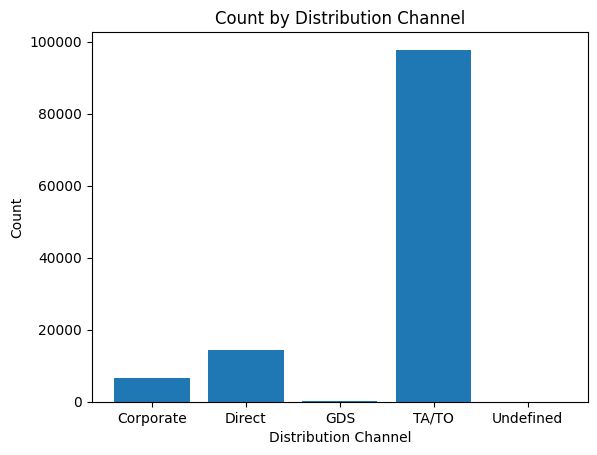

In [24]:
lead_time_stats = pd.DataFrame(lead_time_stats)
lead_time_stats = lead_time_stats.reset_index()

# Create a bar chart
plt.bar(lead_time_stats['distribution_channel'], lead_time_stats['count'])
plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.title('Count by Distribution Channel')
plt.show()

Key Takeaways:

1.  **Average Lead Time Variability** <br>
The average lead time varies significantly across different distribution channels. The "TA/TO" channel has the highest average lead time, suggesting that bookings through travel agents and tour operators are often made further in advance. The "Direct" channel has a lower average lead time compared to "TA/TO", indicating that customers booking directly tend to do so closer to their arrival date. "Corporate" and "GDS" channels have relatively low average lead times.

2.  **Spread of Lead Time** <br>
The standard deviation indicates the variability of lead times within each channel. "TA/TO" and "Direct" channels show a higher standard deviation, meaning there is a wider range of lead times for bookings coming through these channels. "Corporate" and "GDS" have lower standard deviations, suggesting more consistent lead times.

3.  **Minimum and Maximum Lead Times** <br>
All channels have a minimum lead time of 0 days (same-day bookings). The maximum lead time is very high for "Direct" and "TA/TO" channels, further emphasizing that some bookings are made very far in advance through these channels.

4.  **Median Lead Time (50th Percentile)** <br>
The median lead time provides a better sense of the typical booking window, as it is less affected by extreme values. The median lead time is highest for "TA/TO", followed by "Direct", and then "GDS" and "Corporate". This confirms that TA/TO and Direct bookings generally have longer lead times than Corporate and GDS bookings.

In summary, the distribution channel significantly impacts the lead time of bookings. "TA/TO" and "Direct" channels are associated with longer and more variable lead times, while "Corporate" and "GDS" channels have shorter and more consistent lead times. Understanding these differences is crucial for inventory management, pricing strategies, and forecasting demand for each channel.

### Booking Changes Frequency by Channel

In [25]:
booking_changes_stats = df.groupby("distribution_channel")["booking_changes"].describe()
booking_changes_stats

,count,mean,std,min,25%,50%,75%,max
distribution_channel,,,,,,,,
Corporate,6491.0,0.370051,0.770522,0.0,0.0,0.0,1.0,11.0
Direct,14483.0,0.398743,0.822882,0.0,0.0,0.0,1.0,20.0
GDS,193.0,0.093264,0.370256,0.0,0.0,0.0,0.0,3.0
TA/TO,97729.0,0.185226,0.609030,0.0,0.0,0.0,0.0,21.0
Undefined,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


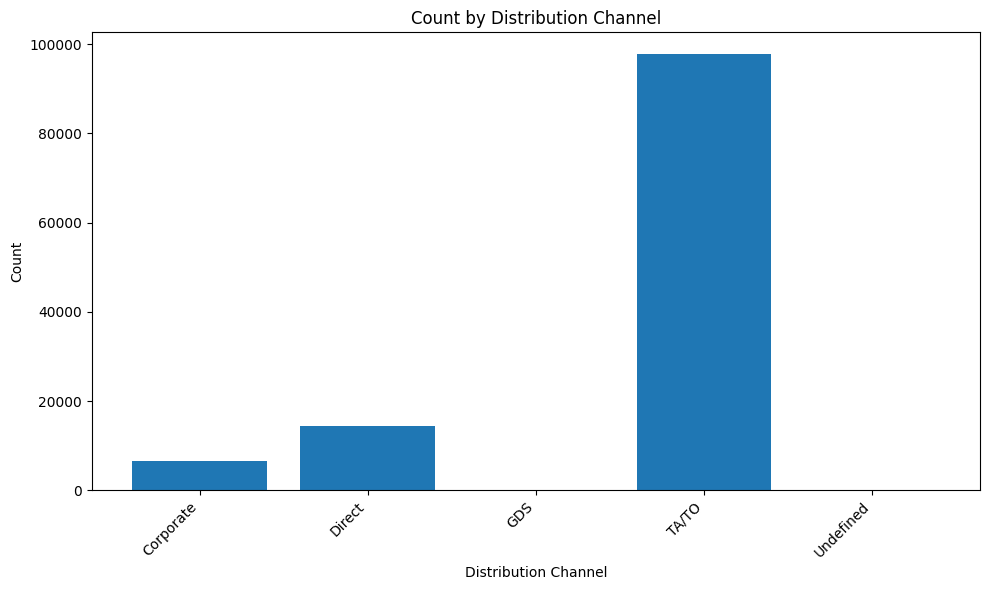

In [26]:
booking_changes_stats = pd.DataFrame(booking_changes_stats)
booking_changes_stats = booking_changes_stats.reset_index()

# Create a bar chart using distribution_channel and count columns
plt.figure(figsize=(10, 6))
plt.bar(booking_changes_stats['distribution_channel'], booking_changes_stats['count'])
plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.title('Count by Distribution Channel')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Key Takeaways:

1.  **Average Booking Changes Variability** <br>
The "GDS" and "Corporate" channels have the highest average number of booking changes, despite having fewer total bookings. In contrast, "Direct" and "TA/TO" channels handle the majority of bookings but show a lower average number of changes.
2.  **Spread of Booking Changes** <br>
The standard deviation of booking changes is higher for "Direct" and "TA/TO", suggesting more variability in these channels. "GDS" and "Corporate" show lower variability, indicating more consistent booking behavior.
3.  **Minimum and Maximum Booking Changes** <br>
All channels have a minimum of 0 booking changes, meaning many bookings are unaltered. However, the maximum number of changes is significantly higher in "Direct" and "TA/TO", showing that some bookings in these high-volume channels undergo many changes.
4.  **Median Booking Changes (50th Percentile)** <br>
The median booking changes across all channels is 0, indicating that most bookings are not modified. Higher means in "GDS" and "Corporate" are influenced by a few bookings with many changes.

In summary, while the *median* number of booking changes is zero across all channels, the *average* and *maximum* changes differ. The "GDS" and "Corporate" channels tend to have a higher average number of changes per booking (though with much lower booking volumes), while "Direct" and "TA/TO" channels have a lower average but show a greater possibility of individual bookings having a very high number of changes. This suggests that while most bookings are stable, operational efficiency around anaging changes might be particularly important for bookings from GDS and Corporate channels, and for outlier cases in Direct and TA/TO channels.

## OPERATIONAL EFFICIENCIES
We can improve operational efficiency by reducing cancellations, manual changes, and resource misallocation.

### Cancellation Rate by Lead Time Range

In [27]:
df["lead_time_range"] = pd.cut(df["lead_time"], bins=[0, 30, 90, 180, 365])
lead_time_cancel = df.groupby("lead_time_range")["is_canceled"].mean()
lead_time_cancel

<ipython-input-27-3203119248>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_time_cancel = df.groupby("lead_time_range")["is_canceled"].mean()


,is_canceled
lead_time_range,
"(0, 30]",0.209878
"(30, 90]",0.377130
"(90, 180]",0.447507
"(180, 365]",0.554212


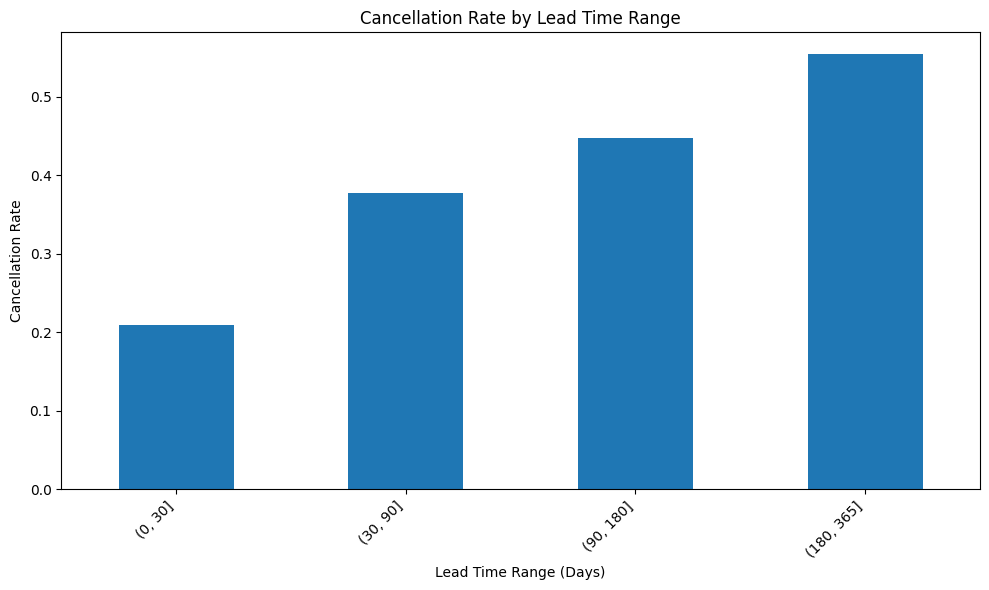

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart using the lead_time_cancel
plt.figure(figsize=(10, 6))
lead_time_cancel.plot(kind='bar')
plt.title('Cancellation Rate by Lead Time Range')
plt.xlabel('Lead Time Range (Days)')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Key Takeaways:

1.  **Higher Lead Time, Higher Cancellation Rate** <br>
Bookings made further in advance (higher lead time ranges like (90, 180] and (180, 365]) show a significantly higher cancellation rate compared to bookings made closer to the arrival date (lower lead time ranges like (0, 30]).
2.  **Short Lead Times are Less Likely to Cancel** <br>
Bookings with a lead time between 0 and 30 days have the lowest cancellation rate.
3.  **Cancellation Risk Increases with Booking Window** <br>
The longer the time between booking and arrival, the greater the likelihood that the booking will be cancelled.

These suggest that focusing on strategies to reduce cancellations for bookings with longer lead times could significantly improve operational efficiency and revenue. This could involve reminder emails, flexible booking options, or targeted offers closer to the arrival date for these bookings.

### Room Mismatch Rate

In [29]:
room_mismatch_rate = df["room_mismatch"].mean()
print(f"\nRoom Mismatch Rate: {room_mismatch_rate:.2%}")


Room Mismatch Rate: 12.36%


Key Takeaways:


1.  **Operational Inefficiency** <br>
A mismatch rate of 12.36% indicates that a significant portion of guests (around one in eight) are not being assigned the room type they initially reserved. This suggests potential issues in room inventory management, allocation, or operational processes.
2.  **Potential for Guest Dissatisfaction** <br>
While sometimes room changes are due to customer requests, a 12.36% mismatch rate likely includes instances where the assigned room is different from the reserved one due to operational reasons (like overbooking or misallocation). This can lead to guest dissatisfaction and negative experiences, potentially impacting reviews and return visits.
3.  **Further Investigation Needed** <br>
The 12.36% rate highlights an area for improvement. Further analysis is needed to understand *why* these mismatches are occurring (e.g., overbooking, operational errors, guest requests, specific room types having higher mismatch rates) and the impact on guest satisfaction and operational costs.

The actual percentage value of `room_mismatch_rate` will determine the severity of this issue and the priority for addressing it. A high percentage would indicate a significant operational challenge that needs urgent attention.

### Special Requests Distribution

In [30]:
special_requests_dist = df["total_of_special_requests"].value_counts().sort_index()
special_requests_dist

,count
total_of_special_requests,
0,69990
1,33121
2,12922
3,2487
4,339
5,38


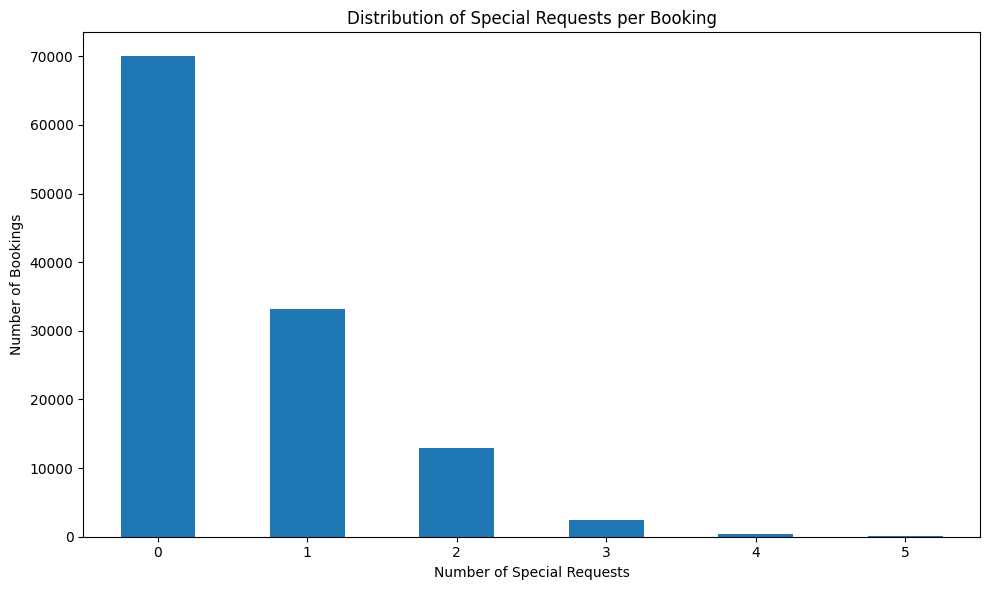

In [31]:
#bar chart of total_of_special_requests
plt.figure(figsize=(10, 6))
special_requests_dist.plot(kind='bar')
plt.title('Distribution of Special Requests per Booking')
plt.xlabel('Number of Special Requests')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Key Takeaways:

1.  **Majority of Bookings Have No Special Requests** <br>
The largest number of bookings have 0 special requests. This indicates that most guests do not add any additional specifications or preferences to their booking.
2.  **Decreasing Frequency with More Requests** <br>
As the number of special requests increases, the frequency of bookings with that number of requests significantly decreases. Bookings with 1 special request are less common than those with 0, bookings with 2 requests are even less common, and so on.
3.  **Low Frequency of Multiple Requests** <br>
Bookings with a higher number of special requests (3 or more) are relatively rare.
4.  **Operational Implications** <br>
The distribution highlights that while the hotel needs to be prepared to handle special requests, the volume is concentrated on bookings with 0 or 1 request. This information can be useful for staffing and resource allocation, particularly for operational teams responsible for fulfilling these requests. The infrequent occurrence of bookings with many special requests means these might require more specific attention or processes.

### Cancellation Rate by Deposit Type

In [32]:
deposit_cancel_rate = df.groupby("deposit_type")["is_canceled"].mean()
deposit_cancel_rate

,is_canceled
deposit_type,
No Deposit,0.284525
Non Refund,0.993618
Refundable,0.222222


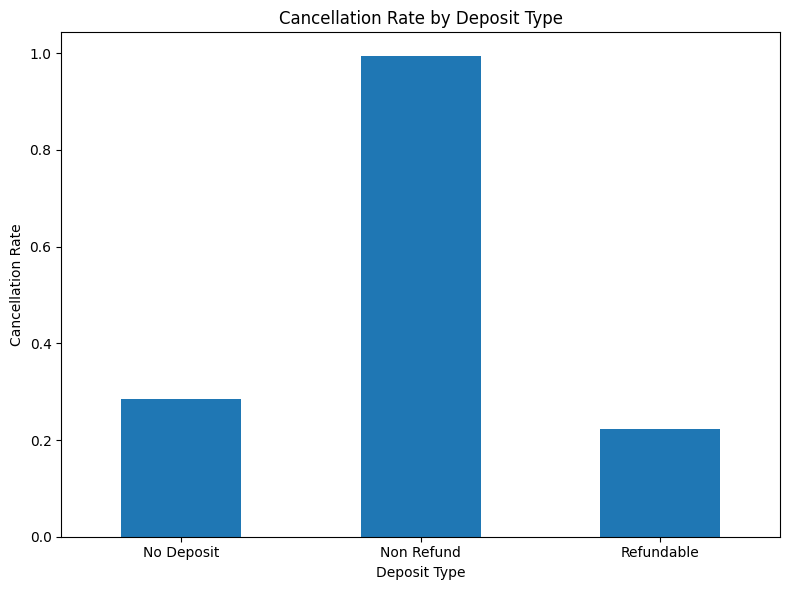

In [33]:
# bar chart of deposit_cancel_rate
plt.figure(figsize=(8, 6))
deposit_cancel_rate.plot(kind='bar')
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Key Takeaways:

1.  **Non-Refundable Deposits Lead to Very Low Cancellation** <br>
Bookings with a "Non Refund" deposit type have an extremely low cancellation rate. This is expected, as guests are less likely to cancel when they have made a non-refundable payment covering the total cost of the stay.
2.  **No Deposit and Refundable Deposits Have High Cancellation Rates** <br>
Bookings with "No Deposit" and "Refundable" deposit types show significantly higher cancellation rates compared to "Non Refund".
3.  **Highest Cancellation Rate for "Non Deposit"** <br>
Bookings made with "No Deposit" have the highest cancellation rate among all deposit types.
4.  **Cancellation Risk is Highly Dependent on Deposit Policy** <br>
The presence and nature of a deposit are strong indicators of the likelihood of a booking being cancelled. Bookings without financial commitment or with the option of a refund are much more prone to cancellation.

In summary, the deposit policy is a critical factor influencing cancellation rates. Implementing or encouraging non-refundable deposit options could be an effective strategy to reduce cancellations and improve revenue predictability, although it might also impact booking volume depending on customer preferences.

## DISCOVERING OTHER PATTERNS

In [34]:
cancelled_percentage = df['is_canceled'].value_counts(normalize = True)
cancelled_percentage

,proportion
is_canceled,
0,0.628653
1,0.371347


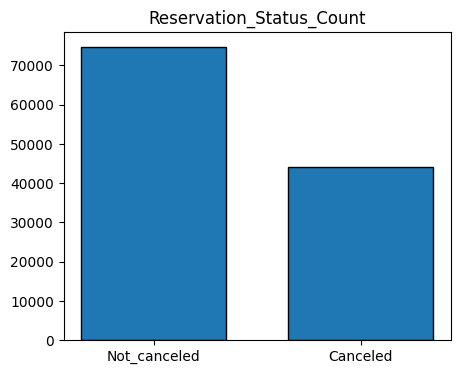

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (5,4))
plt.title('Reservation_Status_Count')
plt.bar(['Not_canceled','Canceled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)
plt.show()

In [36]:
# To make readable replace 0 with 'not canceled' and 1 with 'canceled' in the 'is_canceled' column
df['is_canceled'] = df['is_canceled'].replace({0: 'not canceled', 1: 'canceled'})

Text(0.5, 1.0, 'Reservation Status in different hotels')

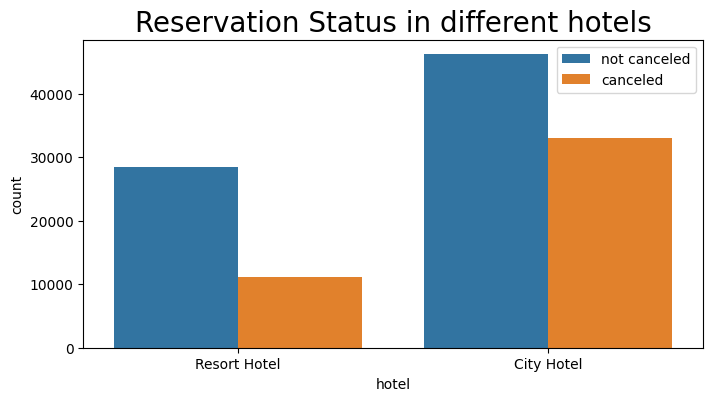

In [37]:
plt.figure(figsize=(8, 4))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df)
ax1.legend(bbox_to_anchor=(1, 1))
legend_labels, _ = ax1.get_legend_handles_labels()
plt.title('Reservation Status in different hotels', size=20)

In [38]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

,proportion
is_canceled,
not canceled,0.72025
canceled,0.27975


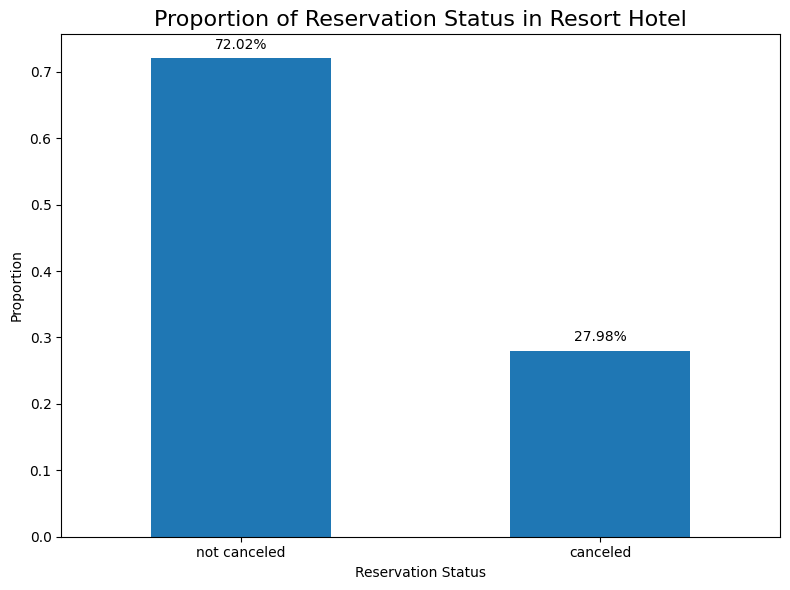

In [39]:
# Proportion of cancellations for City Hotel
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel_cancel_prop = resort_hotel['is_canceled'].value_counts(normalize=True)

# Create the bar chart
plt.figure(figsize=(8, 6))
resort_hotel_cancel_prop.plot(kind='bar')
plt.title('Proportion of Reservation Status in Resort Hotel', size=16)
plt.xlabel('Reservation Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
for i, percentage in enumerate(resort_hotel_cancel_prop.values):
    plt.text(i, percentage + 0.01, f'{percentage:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Key takeaways:

*   **Lower Cancellation Rate Compared to City Hotel** <br>
The Resort Hotel has a significantly lower cancellation rate (27.98%) compared to the City Hotel (implied to be higher since the overall cancellation rate is 37.04% and the Resort Hotel rate is lower than the overall average). This suggests that bookings at the Resort Hotel are less likely to be canceled than those at the City Hotel.
*   **Majority of Resort Hotel Bookings are Not Canceled** <br>
A substantial majority of bookings for the Resort Hotel (72.03%) are not canceled. This is a positive sign for the resort's operational stability and revenue.
*   **Focus Operational Efficiency Efforts on City Hotel (for Cancellations)** <br>
The lower cancellation rate at the Resort Hotel suggests that efforts to reduce cancellations might be more impactful and urgent for the City Hotel, where the cancellation rate is likely higher.
*   **Resort Hotel Strengths** <br>
The data highlights that the Resort Hotel is relatively successful in converting bookings into actual stays. Further analysis could explore the factors contributing to this lower cancellation rate (e.g., different guest demographics, longer stay durations, specific amenities or experiences offered at the resort).

In [40]:
City_hotel = df[df['hotel'] == 'City Hotel']
City_hotel['is_canceled'].value_counts(normalize = True)

,proportion
is_canceled,
not canceled,0.582918
canceled,0.417082


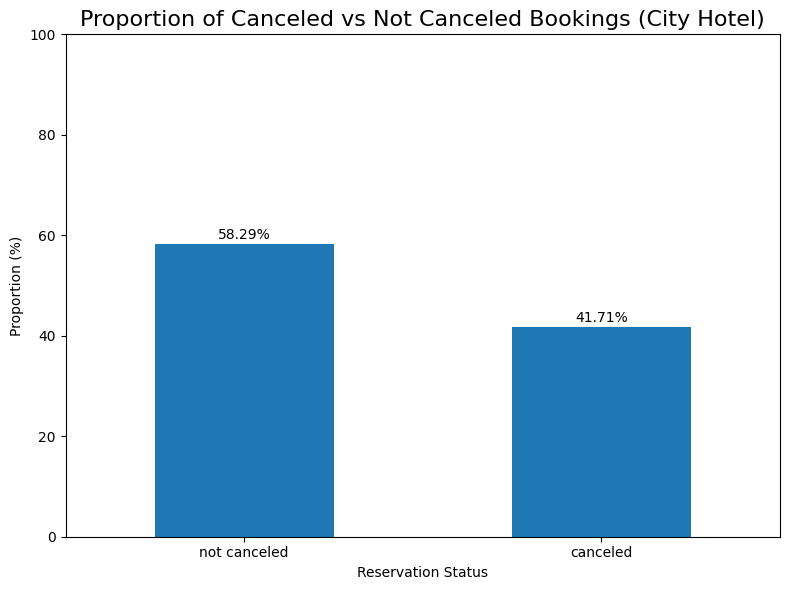

In [41]:
city_hotel_df = df[df['hotel'] == 'City Hotel']

# Calculate the proportion of canceled vs not canceled bookings for City Hotel
city_cancellation_proportion = city_hotel_df['is_canceled'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
city_cancellation_proportion.plot(kind='bar')
plt.title('Proportion of Canceled vs Not Canceled Bookings (City Hotel)', size=16)
plt.xlabel('Reservation Status')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.text(0, city_cancellation_proportion['not canceled'] + 1, f"{city_cancellation_proportion['not canceled']:.2f}%", ha='center')
plt.text(1, city_cancellation_proportion['canceled'] + 1, f"{city_cancellation_proportion['canceled']:.2f}%", ha='center')
plt.tight_layout()
plt.show()


Key Takeaways:

*   **Significant Cancellation Rate** <br>
A cancellation rate of 40.17% for the City Hotel is quite high. This indicates that a substantial portion of bookings made for the City Hotel are eventually canceled.
*   **Operational and Revenue Impact** <br>
This high cancellation rate has a significant impact on the City Hotel's operations and revenue. It can lead to lost revenue from vacant rooms, increased costs associated with managing cancellations and rebookings, and challenges in capacity planning.
*   **Contrast with Not Canceled** <br>
While a majority (58.30%) of bookings are not canceled, the high cancellation rate still presents a major challenge that requires attention.
*   **Need for Investigation** <br>
The high cancellation rate for the City Hotel suggests a strong need to investigate the factors driving these cancellations. Understanding the reasons behind cancellations (e.g., lead time, deposit type, market segment, customer type) is crucial for developing strategies to mitigate this issue.

In [42]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
City_hotel = City_hotel.groupby('reservation_status_date')[['adr']].mean()

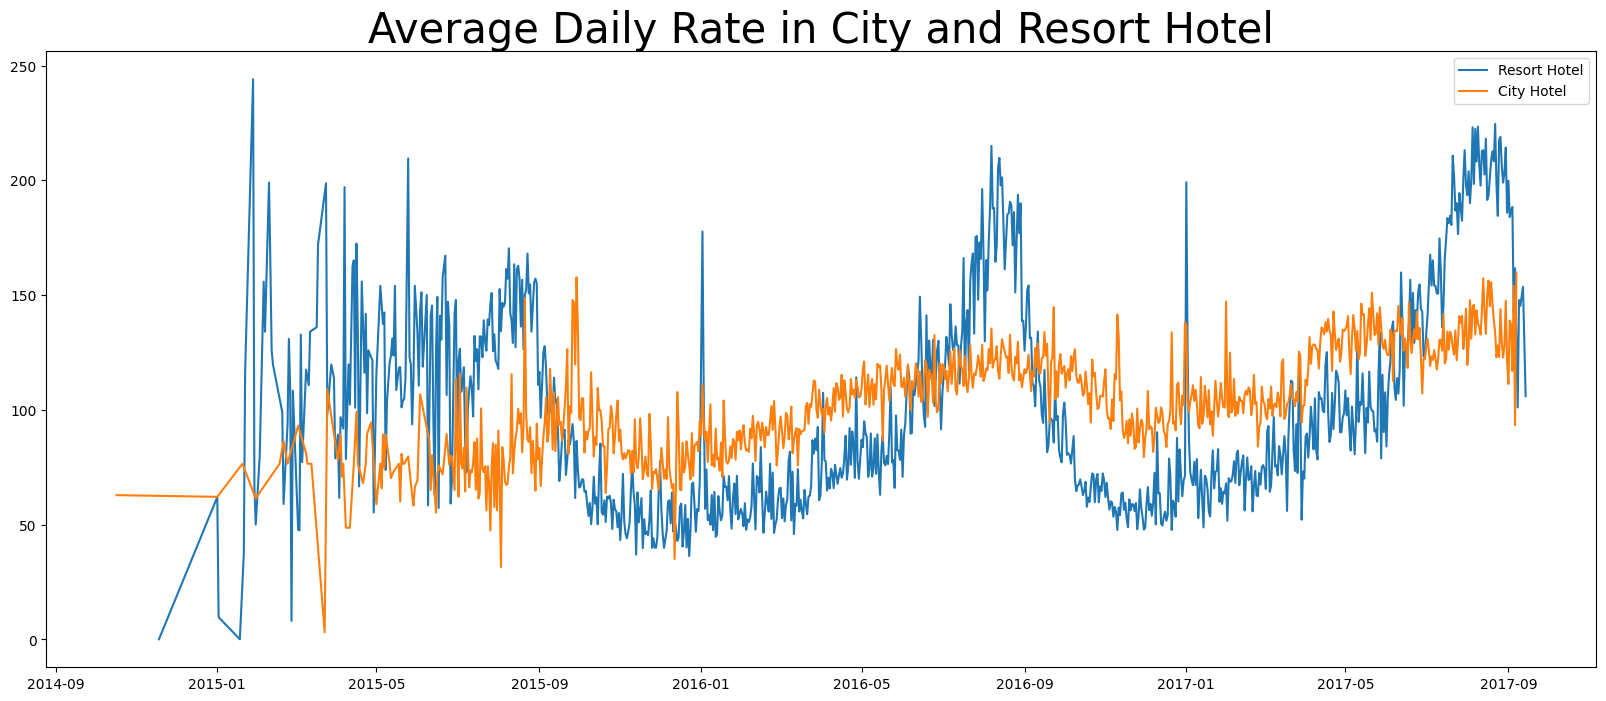

In [43]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City and Resort Hotel',fontsize = 30)
plt.plot(resort_hotel.index,resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(City_hotel.index,City_hotel['adr'], label = 'City Hotel')
plt.legend()

Key Takeaways:

1. **Seasonal Trends** <br>
Both City and Resort Hotels show clear seasonal patterns in their ADR, with peaks and troughs throughout the year.
2. **ADR Levels** <br>
Generally, the Resort Hotel appears to have a higher average ADR than the City Hotel for most of the plotted period.
3. **Variability** <br>
The ADR for the Resort Hotel seems to exhibit more pronounced fluctuations and peaks compared to the City Hotel, suggesting potentially higher demand or different pricing strategies during peak seasons.
4. **Peak Seasons** <br>
The highest ADR are `2015-01, 2016-01, 2016-08, 2017-01, 2017-08`. This likely corresponds to peak tourist seasons, which appear to be during the new year or religious holiday.
5. **Impact of Events/Holidays** <br>
Sharp spikes or dips in ADR might correlate with specific events, holidays, or external factors not explicitly included in this plot.

It's important to note that the y-axis scale might vary depending on the range of ADR values, which can affect the visual perception of the differences between the two hotels. Hence, we visualize it using different chart to make it readable and doesn't look complex.

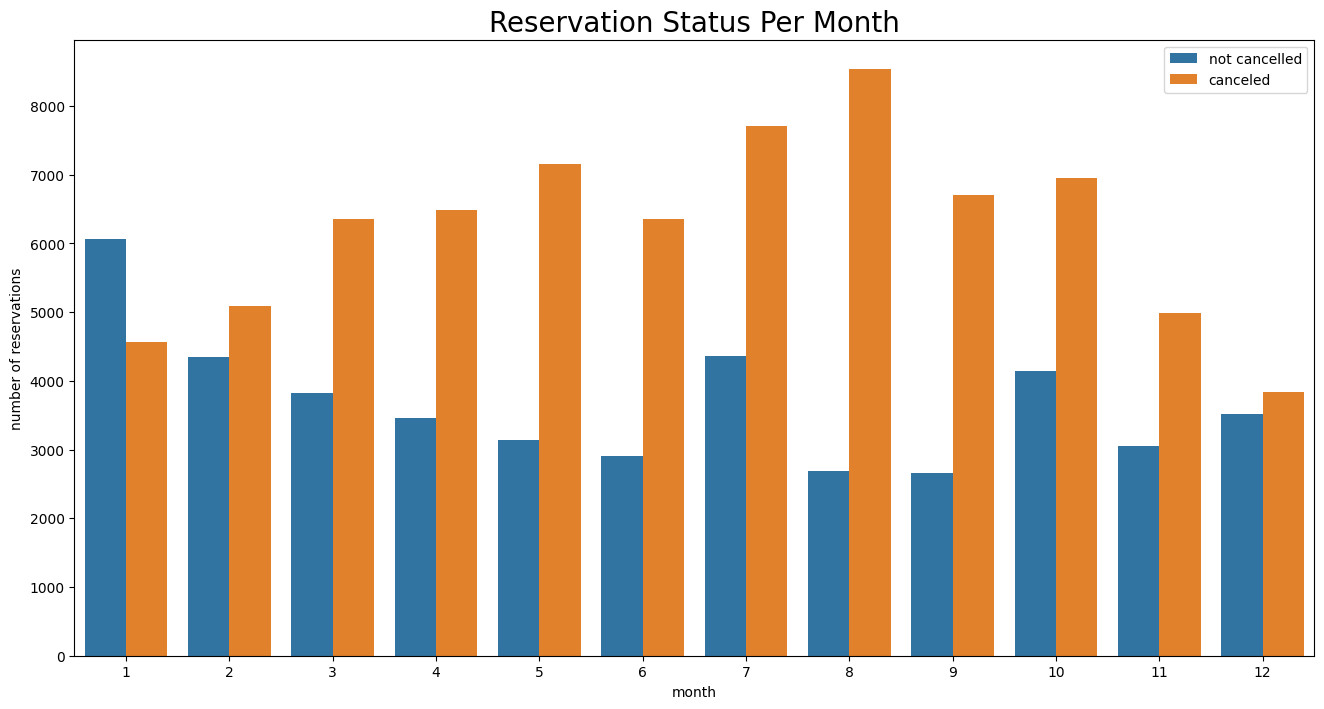

In [44]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x= 'month',hue = 'is_canceled',data = df)
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor = (1,1))
plt.title('Reservation Status Per Month', size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not cancelled','canceled'])
plt.show()

Key takeaways:

1. **Seasonal Variation in Bookings** <br>
There's a clear seasonal pattern in the total number of reservations, with certain months having significantly more bookings than others.
2. **Seasonal Variation in Cancellations** <br>
The number of canceled reservations also varies by month, and this variation seems to largely follow the pattern of total reservations. Months with more total bookings tend to have more cancellations in absolute numbers.
3. **Peak Booking/Cancellation Months** <br>
The highest number of cancellations are July and August. These months likely correspond to peak travel seasons.
4. **Months with Lower Activity** <br>
The lowest total reservations and cancellations are November - December.

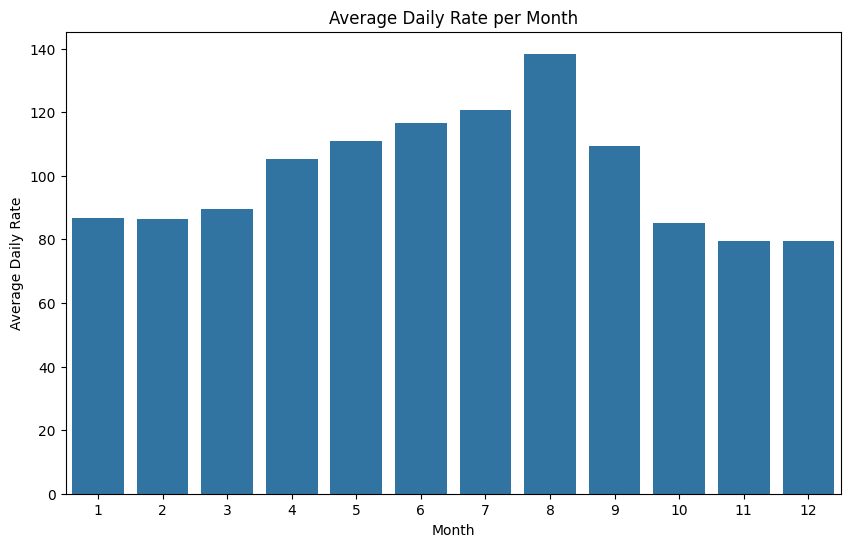

In [45]:
# Visualizes the average daily rate per month using Seaborn's barplot based on the calculated mean daily rates grouped by month.

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average daily rate for each month
average_daily_rate = df.groupby('month')['adr'].mean().reset_index()

# Plotting average daily rate for each month with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='adr', data=average_daily_rate)
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.title('Average Daily Rate per Month')
plt.show()

Key takeaways:

1. **Seasonal Fluctuations** <br>
The average daily rate varies significantly throughout the year, showing a clear seasonal pattern.
2. **Peak Season for ADR** <br>
The months of July and August appear to have the highest average daily rates, indicating that these are likely peak seasons for the hotels with higher demand driving up prices.
3. **Lower ADR in Off-Season** <br>
The months with lower average daily rates are typically during the late autumn and winter (e.g., October, November, December, January, February, March). This suggests lower demand during these periods.
4. **Gradual Increase and Decrease** <br>
The ADR generally increases gradually from the beginning of the year, peaks in the school or religious holiday, and then decreases gradually towards the end of the year.

In [46]:
#df.to_csv('drive/MyDrive/DS/hotel_reservation_dataset_cleaned.csv', index=False)

# Forecast The Number of Visitors

To perform visitor forecasting, we need a time series with a 'ds' (datetime) and a 'y' (numerical value to forecast) column. The current dataset does not have a direct visitor count column. However, we can use the reservation count over time as a proxy for visitor volume. We'll use the **`reservation_status_date`** as the time component ('ds') and the total number of reservations on each date as the value to forecast ('y').

In [47]:
!pip install prophet

## Model 1 (Prophet without Holiday Effect)

In [48]:
from prophet import Prophet

In [49]:
# Group by date and count the number of reservations
reservations_by_date = df.groupby('reservation_status_date').size().reset_index(name='reservation_count')

In [50]:
# Rename columns to match Prophet's required input format
reservations_by_date = reservations_by_date.rename(columns={
    'reservation_status_date': 'ds',
    'reservation_count': 'y'
})

# Display the first few rows of the prepared data
print("Prepared data for Prophet:")
reservations_by_date.head()

Prepared data for Prophet:


,ds,y
0,2014-10-17,180
1,2014-11-18,1
2,2015-01-01,763
3,2015-01-02,16
4,2015-01-18,1


In [51]:
# Initialize and fit the Prophet model
# We can add seasonality components if needed (e.g., yearly, weekly)
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(reservations_by_date)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo06lr9p/qlg4_ryb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo06lr9p/2d74r7jy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86251', 'data', 'file=/tmp/tmpgo06lr9p/qlg4_ryb.json', 'init=/tmp/tmpgo06lr9p/2d74r7jy.json', 'output', 'file=/tmp/tmpgo06lr9p/prophet_model7y2soi_w/prophet_model-20250616034107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:41:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:41:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [52]:
# Create a future dataframe for making predictions
future = model.make_future_dataframe(periods=90) # Forecast for the next 90 days

In [53]:
# Make predictions
forecast = model.predict(future)

In [54]:
# Display the forecast dataframe
print("\nForecast data:")
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


Forecast data:


,ds,yhat,yhat_lower,yhat_upper
1011,2017-12-09,42.891597,-49.297728,137.793759
1012,2017-12-10,69.832138,-28.116859,164.895583
1013,2017-12-11,78.672908,-19.679960,176.599608
1014,2017-12-12,58.833182,-44.144710,150.671141
1015,2017-12-13,64.461837,-37.459977,159.118400


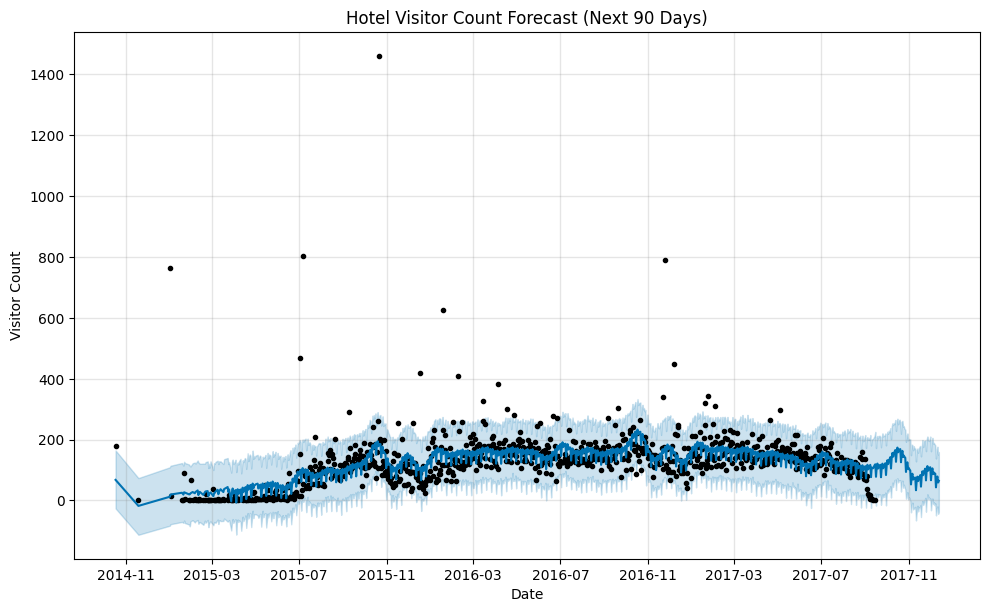

In [55]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Hotel Visitor Count Forecast (Next 90 Days)')
plt.xlabel('Date')
plt.ylabel('Visitor Count')
plt.show()

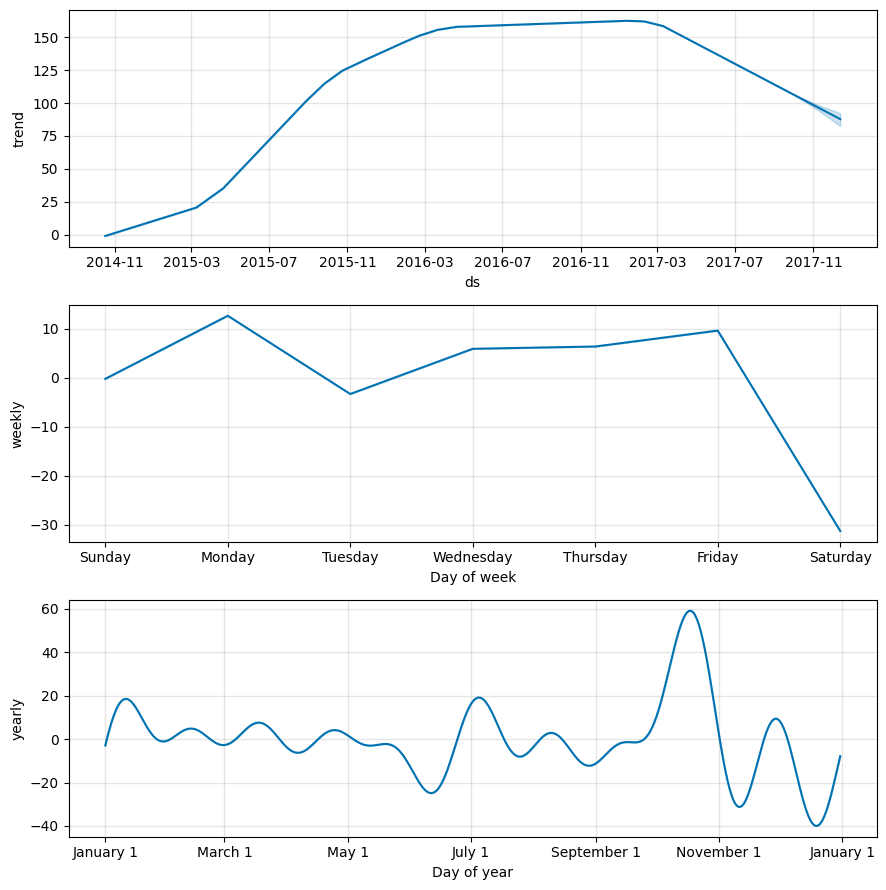

In [56]:
# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()

## Model 2 (Prophet with Holiday Effect)

Since we consider that there are seasonal and holiday effect on the trend, we build a forecast model by enhancing the previous model with an adjustment of holiday effect.

In [57]:
daily = df.groupby('reservation_status_date').size().reset_index(name='reservation_count')
daily.columns = ["ds", "y"]

# Define Indonesian holidays (sample)
indonesia_holidays = pd.DataFrame({
    "holiday": "id_holiday",
    "ds": pd.to_datetime([
        "2015-01-01", "2015-05-14", "2015-07-17",  # New Year, Ascension, Eid al-Fitr
        "2016-01-01", "2016-07-06", "2016-12-25",  # and so on...
    ]),
    "lower_window": 0,
    "upper_window": 1  # 1-day spillover effect
})



In [58]:
# Initialize Prophet with holidays
model2 = Prophet(holidays=indonesia_holidays)
model2.fit(daily)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo06lr9p/fpdx27zr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgo06lr9p/7_l272vm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15022', 'data', 'file=/tmp/tmpgo06lr9p/fpdx27zr.json', 'init=/tmp/tmpgo06lr9p/7_l272vm.json', 'output', 'file=/tmp/tmpgo06lr9p/prophet_model_x88quzr/prophet_model-20250616034109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:41:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:41:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [59]:
# Forecast
future = model2.make_future_dataframe(periods=90)
forecast = model2.predict(future)


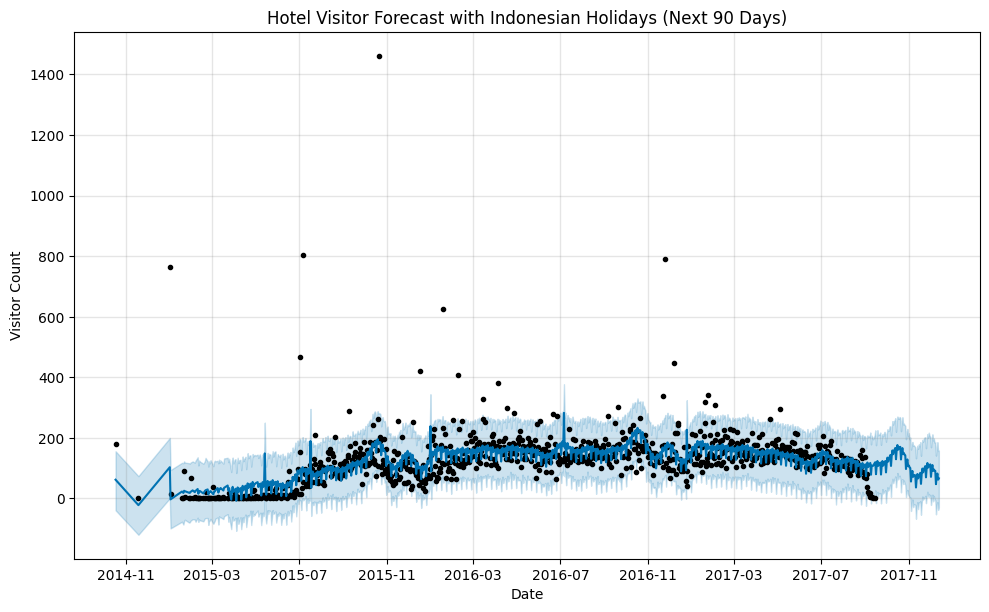

In [60]:
# Plot the forecast
fig1 = model2.plot(forecast)
plt.title('Hotel Visitor Forecast with Indonesian Holidays (Next 90 Days)')
plt.xlabel('Date')
plt.ylabel('Visitor Count')
plt.show()

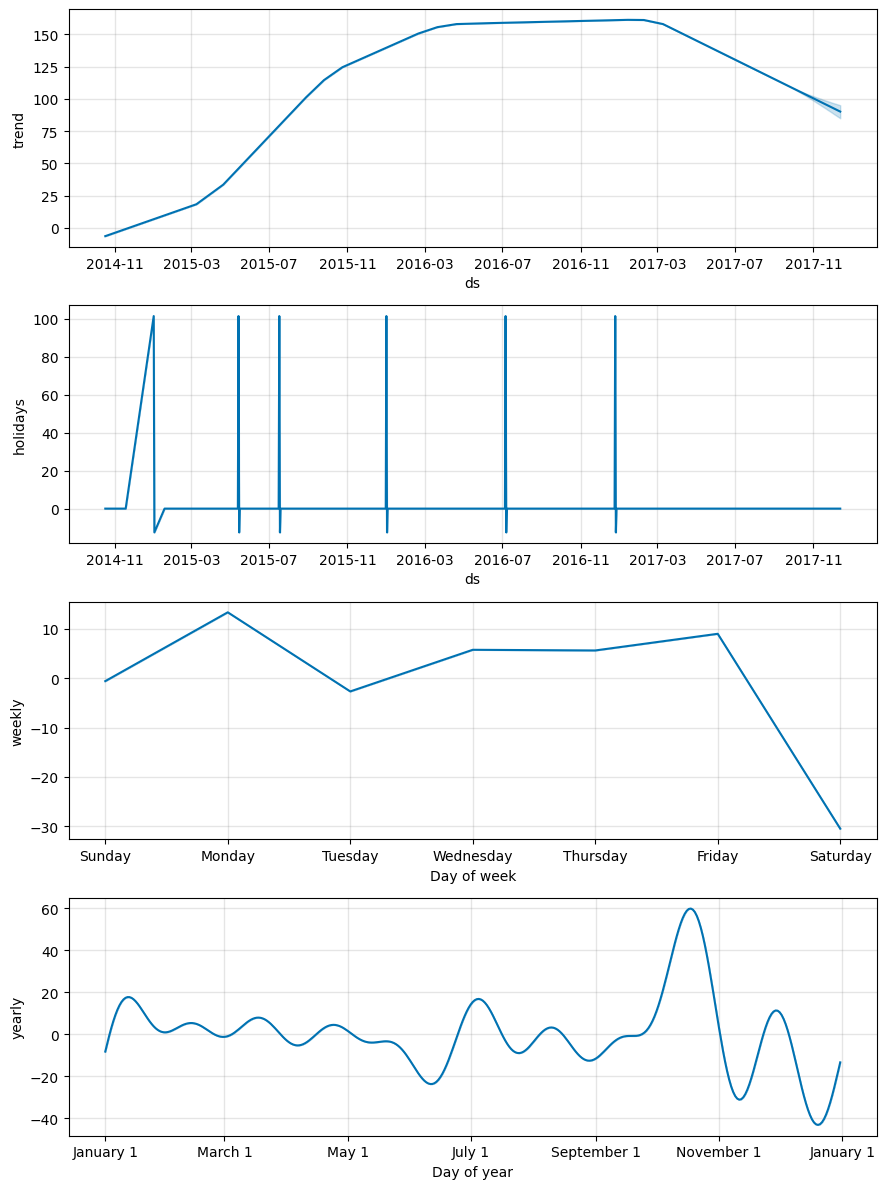

In [61]:
# Plot the components of the forecast
fig2 = model2.plot_components(forecast)
plt.show()

## Model 3 (LightGBM)

In [62]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [63]:
# Date feature engineering
daily["year"] = daily["ds"].dt.year
daily["month"] = daily["ds"].dt.month
daily["day"] = daily["ds"].dt.day
daily["day_of_week"] = daily["ds"].dt.dayofweek
daily["is_weekend"] = daily["day_of_week"].isin([5, 6]).astype(int)


In [64]:
# Split data
X = daily[["year", "month", "day", "day_of_week", "is_weekend"]]
y = daily["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=30)


In [65]:
# Train
model_lgb = lgb.LGBMRegressor()
model_lgb.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 896, number of used features: 5
[LightGBM] [Info] Start training from score 130.108259


LGBMRegressor()

In [66]:
# Predict
y_pred = model_lgb.predict(X_test)
rmse_lgb = mean_squared_error(y_test, y_pred)

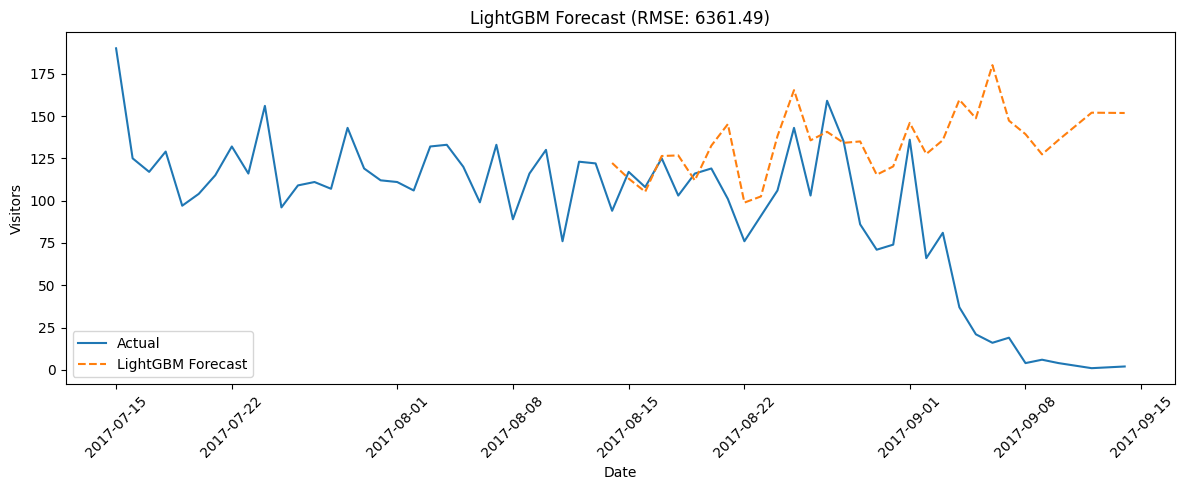

In [67]:
# Plot
plt.figure(figsize=(12, 5))
plt.plot(daily["ds"][-60:], y[-60:], label="Actual")
plt.plot(daily["ds"][-30:], y_pred, label="LightGBM Forecast", linestyle="--")
plt.title(f"LightGBM Forecast (RMSE: {rmse_lgb:.2f})")
plt.xlabel("Date")
plt.ylabel("Visitors")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:
# Prophet RMSE
rmse_prophet = mean_squared_error(
    daily["y"][-90:], forecast["yhat"][-90:])

print(f"Prophet RMSE: {rmse_prophet:.2f}")
print(f"LightGBM RMSE: {rmse_lgb:.2f}")


Prophet RMSE: 1670.84
LightGBM RMSE: 6361.49


Key takeaways:

1. **Prophet Model Performance**: The Prophet model has a significantly lower RMSE (1670.84) compared to the LightGBM model. This indicates that, on average, the Prophet model's predictions are much closer to the actual visitor counts than the LightGBM model's predictions.
2. **LightGBM Model Performance**: The LightGBM model has a much higher RMSE (6361.49). This suggests that the LightGBM model's predictions have a larger average error compared to the actual visitor counts.
* **Model Suitability**: Based on these RMSE values, the Prophet model appears to be a better fit for forecasting hotel visitor counts in this case. Prophet is designed for time series data with strong seasonality and trend components, which seems to be present in your data. LightGBM, while a powerful general-purpose machine learning model, might not be capturing the time series patterns as effectively as Prophet in this specific scenario, especially without more extensive feature engineering related to time series components.
* **RMSE as an Evaluation Metric**: Remember that RMSE is a measure of the average magnitude of the errors. A lower RMSE indicates better model performance.

In summary, the comparison of RMSE values clearly shows that the Prophet model is outperforming the LightGBM model for this forecasting task.

# Conclusion and Recomendations

## Recommendation
Based on data analysis & forecasting model development, we can suggest the company in order to increase website visits and improve operational efficiencies:<br>
**Strengthen the Direct Channel with Loyalty Programs**<br>
Capitalize on the high volume of direct bookings by introducing loyalty schemes, tailored offers, and email campaigns to convert first-time visitors into repeat guests.
This approach boosts website traffic, enhances customer retention, and reduces reliance on external booking platforms.

**Implement Dynamic Pricing Based on Lead Time and Seasonality**<br>
Leverage lead time and seasonal trends to adjust pricing strategies.
Offer discounts or value-added incentives for early bookings with higher cancellation risk, while increasing rates during peak periods and providing promotions in low seasons to stimulate direct bookings.

**Reduce Cancellations by Adjusting Deposit Policies**<br>
Promote non-refundable booking options through added value like upgrades or freebies, as these show the lowest cancellation rates.
For long lead time, no-deposit bookings, apply stricter policies or require partial prepayments to secure revenue and minimize cancellations.

**Use Visitor Forecasts to Optimize Staffing and Resource Allocation**<br>
Utilize demand forecasts to plan staffing levels more accurately across hotel departments.
Introduce flexible staffing models to align with expected visitor trends, ensuring efficiency during low-demand and quality service during peak periods.

**Address Room Mismatches and Improve Operational Accuracy**<br>
With a 12.36% mismatch rate, the company should review its room assignment systems and streamline booking processes.
Reducing mismatches improves guest satisfaction, minimizes operational errors, and supports long-term guest loyalty.

**Leverage Data-Driven Campaigns to Boost Website Visits**<br>
Run targeted marketing campaigns during projected low-traffic periods using visitor forecasts.
Use customer behavior data to personalize offers, retarget users, and enhance landing pages for better conversion,especially on mobile and direct channels.

## Conclusion
The analysis highlights strong direct booking performance but low repeat guest retention, pointing to opportunities for loyalty initiatives. High cancellation rates for long lead times and room mismatches reveal operational inefficiencies. By understanding booking behavior and channel dynamics, the company can improve internal processes and enhance the guest experience. Additionally, using Prophet for visitor forecasting proves effective in predicting demand, enabling better resource planning and timely marketing efforts. This data-driven strategy empowers the company to align operations with customer trends and increase website engagement through targeted actions.

<br>
<br>


*`@author: M. Anwar Sanusi`* <br>
*`email : manwarsan@gmail.com`*